In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.5f}'.format

import matplotlib.pyplot as plt
# import geopandas as gpd
import numpy as np 
import datetime

In [2]:
def process_df(df):
    df = df[(df['osm_new_dist']!=0)&(df['osm_new_travel_times']!=0)]
    print(df.shape[0])
    df['diff_dist'] = df['cuebiq_trip_km'] - df['osm_new_dist']
    df['diff_time'] = df['cuebiq_travel_time_min'] - df['osm_new_travel_times']
    # df = df[(df['diff_dist']<10)&(df['diff_dist']>-10)]
    print(df.shape[0])
    return df

In [78]:
df_compare = pd.read_csv('./intermediate_results.csv',header=None)
print(df_compare.shape[0])
df_compare.columns = ['cuebiq_id', 'device_type_code', 'os_name', 'start_zoned_datetime', 'start_geohash', 'start_lat', 'start_lng', 'start_country', 'start_admin1', 'start_admin2', 'start_block_group_id', 'end_zoned_datetime', 'end_geohash', 'end_lat', 'end_lng', 'end_country', 'end_admin1', 'end_admin2', 'end_block_group_id', 'number_of_points', 'cuebiq_travel_time_min', 'speed_kinematic_ms_min', 'speed_kinematic_ms_avg', 'speed_kinematic_ms_max', 'speed_gps_ms_min', 'speed_gps_ms_avg', 'speed_gps_ms_max', 'max_time_gap_seconds', 'length_meters', 'trajectory_wkt', 'provider_id', 'event_date', 'cuebiq_trip_km', 'points_list', 'speed', 'osm_new_dist', 'osm_new_travel_times']
df_compare = process_df(df_compare)
df_compare['start_zoned_datetime'] = pd.to_datetime(df_compare['start_zoned_datetime'], errors='coerce')
print(df_compare['start_zoned_datetime'].dtype)

17541
15696
15696
object


In [79]:
df_compare['start_zoned_datetime'] = pd.to_datetime(df_compare['start_zoned_datetime'], errors='coerce')
df_compare['hour'] = df_compare['start_zoned_datetime'].dt.hour
df_compare = df_compare[df_compare['cuebiq_trip_km']<200]
print(df_compare.shape[0])
df_compare = df_compare[df_compare['diff_time']>=-10]
print(df_compare.shape[0])

14595
11530


In [88]:
df_compare[['start_zoned_datetime', 'hour']].head(10)

,start_zoned_datetime,hour
0,2022-10-23 10:41:25-05:00,10.00000
1,2022-10-23 16:23:05-05:00,16.00000
3,2022-10-23 06:15:56-05:00,6.00000
4,2022-10-23 16:03:37-05:00,16.00000
5,2022-10-23 15:46:10-05:00,15.00000
6,2022-10-23 06:58:40-05:00,6.00000
7,2022-10-23 14:58:51-05:00,14.00000
8,2022-10-23 15:19:06-05:00,15.00000
10,2022-10-22 13:28:26-05:00,13.00000
11,2022-10-22 10:19:05-05:00,10.00000


In [80]:
df_compare.hour.unique()

array([10., 16.,  6., 15., 14., 13., 11.,  5.,  7.,  8.,  9., 12.,  4.,
        0.,  1.,  3.,  2., nan])

In [86]:
df_compare['diff_time'].describe()

count   11530.00000
mean    23.38508   
std     39.35340   
min     -9.99410   
25%     1.00346    
50%     9.68852    
75%     31.30665   
max     406.00695  
Name: diff_time, dtype: float64

In [84]:
df_compare_shortTrips = df_compare[df_compare['cuebiq_trip_km']<=50]
print('mean: ',round(df_compare_shortTrips['diff_time'].mean(),2))
print('median: ',round(df_compare_shortTrips['diff_time'].median(),2))

mean:  9.14
median:  4.7


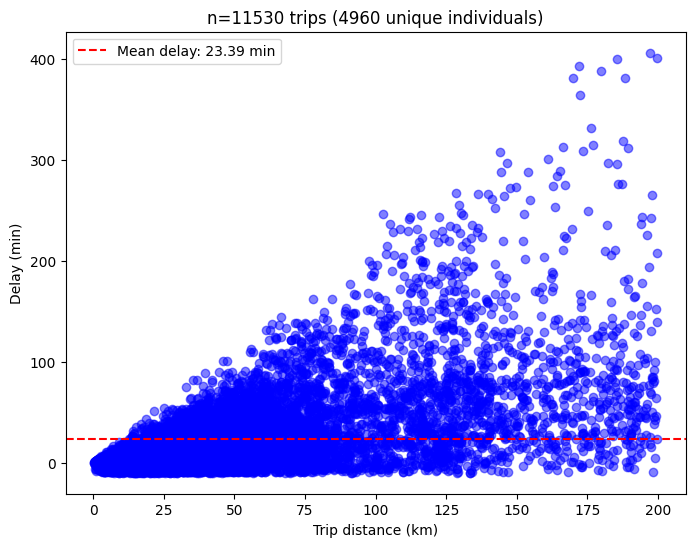

In [85]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_compare['cuebiq_trip_km'], df_compare['diff_time'], color='b', alpha=0.5)
mean_diff_time = df_compare['diff_time'].mean()
plt.axhline(y=mean_diff_time, color='r', linestyle='--', label=f'Mean delay: {mean_diff_time:.2f} min')

# Add labels and title
plt.xlabel('Trip distance (km)')
plt.ylabel('Delay (min)')
plt.title(f'n={df_compare.shape[0]} trips ({df_compare.cuebiq_id.unique().shape[0]} unique individuals)')
plt.legend()
plt.show()

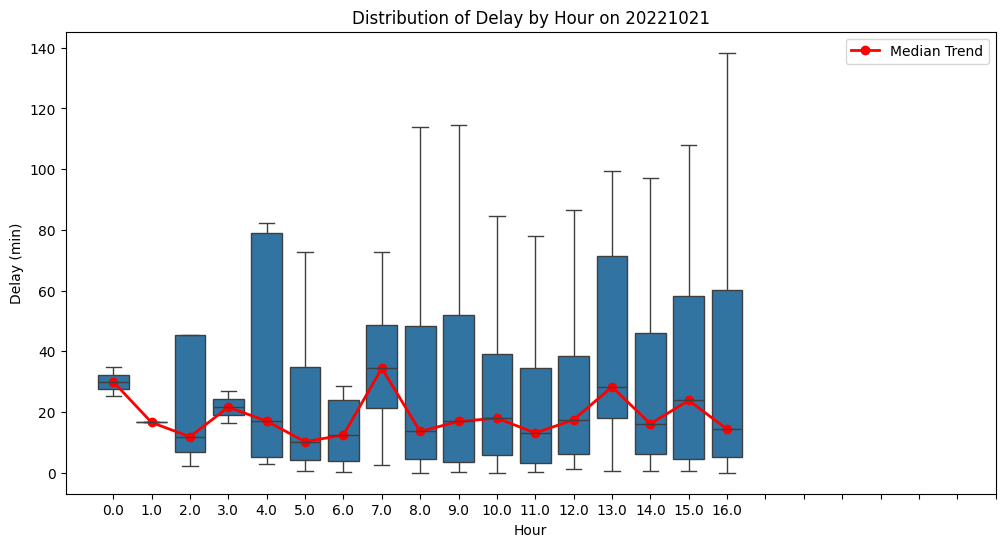

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the date for filtering
date = 20221021

plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(x='hour', y='diff_time', data=df_compare[df_compare['event_date'] == date], showfliers=False)

# Compute median values for each hour
hourly_medians = df_compare[df_compare['event_date'] == date].groupby('hour')['diff_time'].median()

# Overlay a line connecting the medians
plt.plot(hourly_medians.index, hourly_medians.values, color='red', marker='o', linestyle='-', linewidth=2, markersize=6, label='Median Trend')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Delay (min)')
plt.title(f'Distribution of Delay by Hour on {str(date)}')

# Set x-ticks for each hour
plt.xticks(range(0, 24))

# Add legend for the trend line
plt.legend()

# Show plot
plt.show()

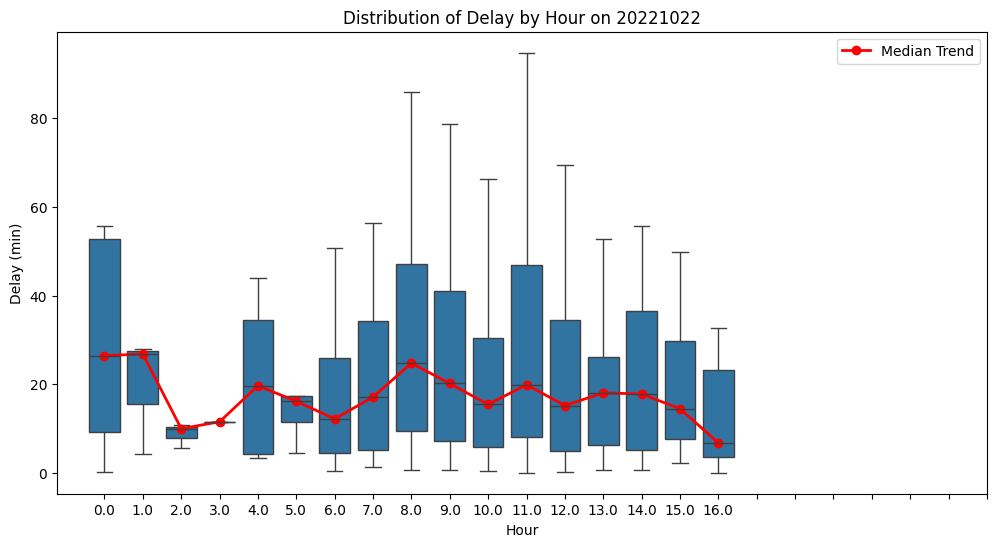

In [55]:
# Define the date for filtering
date = 20221022

plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(x='hour', y='diff_time', data=df_compare[df_compare['event_date'] == date], showfliers=False)

# Compute median values for each hour
hourly_medians = df_compare[df_compare['event_date'] == date].groupby('hour')['diff_time'].median()

# Overlay a line connecting the medians
plt.plot(hourly_medians.index, hourly_medians.values, color='red', marker='o', linestyle='-', linewidth=2, markersize=6, label='Median Trend')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Delay (min)')
plt.title(f'Distribution of Delay by Hour on {str(date)}')

# Set x-ticks for each hour
plt.xticks(range(0, 24))

# Add legend for the trend line
plt.legend()

# Show plot
plt.show()

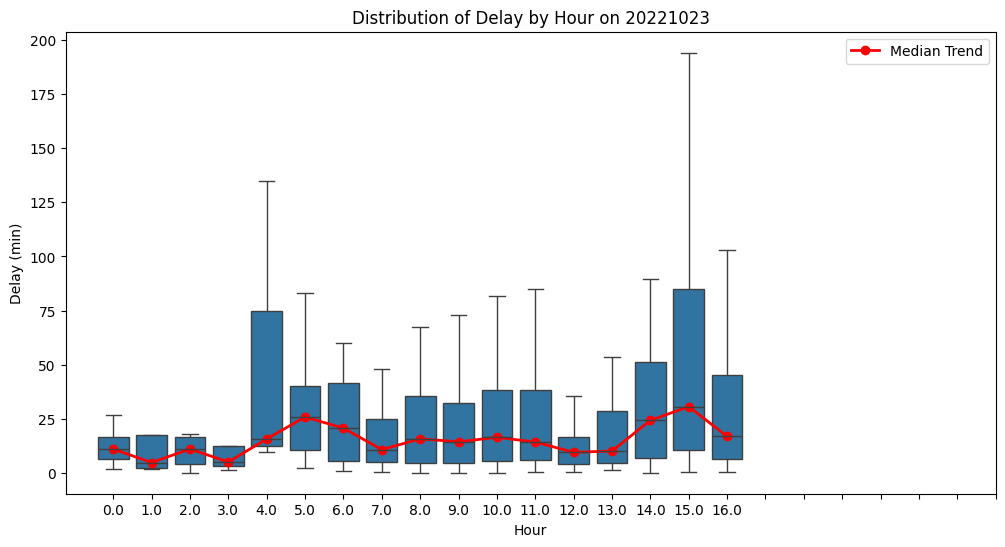

In [56]:
# Define the date for filtering
date = 20221023

plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(x='hour', y='diff_time', data=df_compare[df_compare['event_date'] == date], showfliers=False)

# Compute median values for each hour
hourly_medians = df_compare[df_compare['event_date'] == date].groupby('hour')['diff_time'].median()

# Overlay a line connecting the medians
plt.plot(hourly_medians.index, hourly_medians.values, color='red', marker='o', linestyle='-', linewidth=2, markersize=6, label='Median Trend')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Delay (min)')
plt.title(f'Distribution of Delay by Hour on {str(date)}')

# Set x-ticks for each hour
plt.xticks(range(0, 24))

# Add legend for the trend line
plt.legend()

# Show plot
plt.show()